# Kamili is good

## Section 1

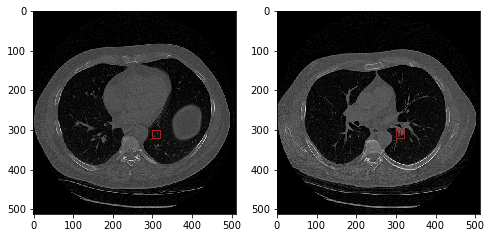

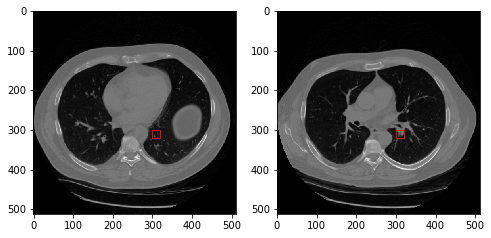

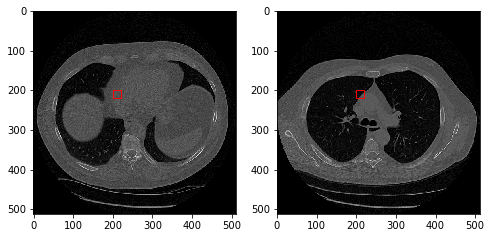

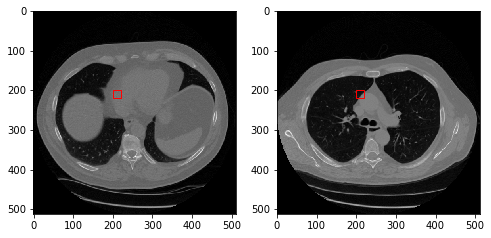

In [16]:
import dicom
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import sys
import os
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

sys.path.insert(0,'./voxelcloud/')
from voxelcloud.dicom_util import load_dicom_series_with_new_spacing

#dicom_dir is the study ID: formate goes patient ID / study ID
dicom_dir = '/Users/camillezhang/Desktop/camille/100004/1.2.840.113654.2.55.174144834924218414213677353968537663991'   

# count the number of dicoms 
dicom_count = 0
for filename in os.scandir(dicom_dir):
    if filename.is_dir():
        dicom_count += 1

# draw images on the console
def produceImage(x, y, z_value, length, image):
    i = 0
    im_slice = image[z_value,:,:]
    z_flip = image.shape[0]-z_value
    im_slice_flip = image[z_flip,:,:]
    list_im = [im_slice, im_slice_flip]
    fig = plt.figure(figsize=(8,8)) # each call to figure() starts an image vertically
    for i, im in enumerate(list_im):
        ax = plt.subplot(1,2,i+1)
        ax.imshow(im, cmap='gray')
        # make labelling
        rect = patches.Rectangle((x,y),length,length,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
        i = i+1
    plt.show()

# get all nodule positions
positions = [(300,300,50), (200,200,38)]

# process each dicom
for pos in positions:
    for filename in os.scandir(dicom_dir):
        if filename.is_dir():
            path = os.path.abspath(filename)
            new_spacing_zyx = [0,0,0]
            series_uid = None
            im = load_dicom_series_with_new_spacing(path, new_spacing_zyx, series_uid)[0]
            #input nodule coordinates here
            produceImage(pos[0],pos[1],pos[2],20, im) #input z value here
    print("==============================================================")
    #pick best match, update each nodule's correct dicom series
    